In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import math
import matplotlib.pyplot as plt

In [ ]:
!pip install python-louvain
import community.community_louvain as cl

In [ ]:
import community
import matplotlib.cm as cm

## Расчёт уровня инфраструктурной обеспеченности (F). Список критериев:
1. Обеспеченность местами в школах
2. Обеспеченность местами в дс
3. Наличие ФАП
4. Наличие банкомата
5. ...

F = a*x1 + b*x2 + c*x3...
где a, b, c... - коэффициент влияния направления (задаётся по желанию, в данном случае равны 1)
x - показатель

In [ ]:
# Чтение данных из файла или создание данных
data = pd.read_csv('infrastructure_3.csv', skiprows=[0], delimiter=';', names=['name','school','kindergarden','post','library','culture','atm','health','port','airport','shop'])

df_inf = pd.DataFrame(data)

# Нормализация данных

def normalize_columns(df_inf, columns=None):
    if not columns:
        columns = df_inf.columns[1:] # все колонки кроме первой

    for col in columns:
        max_value = float(df_inf[col].max())
        min_value = float(df_inf[col].min())

        df_inf[col] = (df_inf[col].astype('float') - min_value) / (max_value - min_value)
    return df_inf


# Нормализуем данные
normalized_df_inf = normalize_columns(df_inf)

# Суммируем нормализованные значения
summed_values = normalized_df_inf.iloc[:, 1:].sum(axis=1) #Все строки и колонки кроме первых

# Добавляем итоговую сумму к исходному DataFrame
result_df_inf = df_inf.copy()
result_df_inf['ind'] = summed_values

result_df_inf = result_df_inf[[result_df_inf.columns[0], result_df_inf.columns[-1]]] #Выбираем только столбцы с названием и итоговой оценкой

df_towns = pd.read_csv('main_towns.csv', delimiter = ';') #Читаем файл с опорными городами
combined_df = pd.concat([result_df_inf, df_towns])

combined_df.sort_values(by='ind', ascending=False)

,name,ind
12,Красноярск,12.000000
2,Архангельск,12.000000
5,Якутск,12.000000
6,Магадан,12.000000
10,Норильск,12.000000
9,Новый Уренгой,12.000000
1,Нарьян-Мар,11.000000
3,Воркута,11.000000
8,Тарко-Сале,10.000000
0,Мезень,9.000000


Расчёт функции времени (T). Виды транспорта:
1. Автомобильный (car)
2. Авиационный (plane)
3. Водный_теплоход (water_ship)
4. Водный_личный (water_boat)
5. Зимний (winter)

2 времени года лето (warm), зима (cold). Для каждого отдельный расчёт. Коэффициенты риска меняются (задаются самостоятельно, отдельно для каждого эксперимента)

T = t * an
an - коэффициент риска транспорта (ratio)


## **Расчёт холодного времени года**

In [ ]:
#Данные на всякий случай сохранить в кодировке utf-8 (через блокнот)
car_ratio=1.3
plane_ratio=1.5
winter_ratio=1.5

# Чтение данных из CSV-файлаw
df = pd.read_csv("cold_time_nao.csv", delimiter=';', names=['depart','arrival','car','plane','winter']) #Перед этим в экселе установить числовой формат и убрвть первую строку с названиями столбцов

#Замена , на .
df['car'] = df['car'].apply(lambda x: x.replace(',', '.')).astype('float')
df['plane'] = df['plane'].apply(lambda x: x.replace(',', '.')).astype('float')
df['winter'] = df['winter'].apply(lambda x: x.replace(',', '.')).astype('float')

print(df)

#Умножение по столбцам на коэффициенты риска
df['car'] = df['car'].apply(lambda x: car_ratio*x)
df['plane'] = df['plane'].apply(lambda x: plane_ratio*x)
df['winter'] = df['winter'].apply(lambda x: winter_ratio*x)

           depart      arrival  car  plane  water_ship  water_boat
0     Алеко-Кюёль     Билибино  0.0    0.0         0.0         0.0
1     Алеко-Кюёль       Сватай  0.0    0.0         0.0         0.0
2      Андрюшкино  Алеко-Кюёль  0.0    0.0         0.0         0.0
3      Андрюшкино     Аргахтах  0.0    0.0         0.0         0.0
4      Андрюшкино     Билибино  0.0    0.0         0.0         0.0
..            ...          ...  ...    ...         ...         ...
179          Эбях       Сватай  0.0    0.0         0.0         0.0
180  Нижнеколымск      Тимкино  0.0    0.0         0.0         0.0
181  Нижнеколымск     Амбарчик  0.0    0.0         0.0         0.0
182  Нижнеколымск      Чукочья  0.0    0.0         0.0         0.0
183  Нижнеколымск    Крестовая  0.0    0.0         0.0         0.0

[184 rows x 6 columns]


In [ ]:
# Чтение данных из файла
df_time = df

# Получение минимальных значений, игнорируя 0 и первые два столбца
results = df.iloc[:, 2:].replace(0, np.nan).apply(lambda x: x.min(), axis=1)

#Сохранение результатов в таблицу
new_df = df_time.copy()
new_df['min'] = results

#Выбор столбцов с названием н.п. и минимальным временем
min_time_cold = new_df[['depart', 'arrival','min']]

#Заполнение пустых строк нулями
min_time_cold['min'] = min_time_cold['min'].fillna(0)

<ipython-input-6-8bd07da5eece>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_time_warm['min'] = min_time_warm['min'].fillna(0)


## Расчёт гравитационной силы (G)

In [ ]:
# Копируем датафрейм в новый датафрейм
combined_df_deleted = combined_df.copy()
min_time_cold_deleted = min_time_cold.copy()
# Определяем список названий деревень, которые нужно удалить
villages_to_remove = ['Кепервеем']

# Удаляем строки, где значение в колонке 'name' совпадает с одним из значений списка villages_to_remove
index_to_drop = combined_df_deleted['name'].isin(villages_to_remove)
combined_df_deleted = combined_df_deleted[~index_to_drop]

# Удаляем строки из min_time_cold_new, где значения в колонках 'depart' или 'arrival' совпадают с одним из значений списка villages_to_remove
index_to_drop_depart = min_time_cold_deleted['depart'].isin(villages_to_remove)
index_to_drop_arrival = min_time_cold_deleted['arrival'].isin(villages_to_remove)
min_time_cold_deleted = min_time_cold_deleted[~(index_to_drop_depart | index_to_drop_arrival)]

combined_df_deleted # Выводим результат

,name,ind
1,Илирней,4.666667
2,Островное,4.833333
3,Анюйск,5.712121
4,Омолон,5.712121
5,Черский,7.575758
6,Нижнеколымск,1.000000
7,Колымское,6.045455
8,Андрюшкино,5.000000
9,Амбарчик,0.000000
10,Две Виски,1.000000


In [ ]:
#Чтение файлов с уровнем инфраструктурной обеспеченности и данными по времени
settl_deleted = dict(zip(combined_df_deleted['name'], combined_df_deleted['ind']))
connect_deleted = min_time_cold_deleted.values.tolist()

# Преобразование данных и вычисление
G_deleted = []
for row in connect_deleted:
    try:
        F1 = float(settl_deleted[row[0]])
        F2 = float(settl_deleted[row[1]])
        r = float(row[2])
        if r == 0:
            LocalGravity = 0
        else:
            LocalGravity = (F1 - F2) / (r ** 2)  # Убрать модуль, чтобы граф стал направленным, тогда можно анализировать что к чему притягивается
        G_deleted.append([row[0], row[1], LocalGravity])
    except KeyError:
        continue  # Пропускаем строки, если ключ не найден

#Сохранение данных в файл csv
local_gravity_deleted = pd.DataFrame(G_deleted, columns=['settl1', 'settl2','LocalGravity'])
#local_gravity.to_csv('Local_gravity_cold_3_deleted.csv', sep=';', index=False)
#print(local_gravity_deleted)

In [ ]:
# Функция для обработки строк
def process_row(row):
    if row['LocalGravity'] < 0:
        # Меняем города местами и делаем значение положительным
        row['settl1'], row['settl2'] = row['settl2'], row['settl1']
        row['LocalGravity'] = abs(row['LocalGravity'])
    return row

#Нормирование значений
def normalize_column_and_sort_descending(df_norm, column_name):
    # Получаем минимальное и максимальное значения в колонке
    min_value = df_norm[column_name].min()
    max_value = df_norm[column_name].max()

    # Нормализуем значения от 0 до 100
    df_norm[column_name] = ((df_norm[column_name] - min_value) / (max_value - min_value)) * 100

    # Сортируем таблицу по нормализованному столбцу в порядке убывания
    df_norm.sort_values(by=column_name, ascending=False, inplace=True)

    return df_norm

In [ ]:
df_row_deleted = local_gravity_deleted
# Применяем функцию ко всем строкам
df_row_deleted = df_row_deleted.apply(process_row, axis=1)
#Нормирование значений
df_norm_deleted = df_row_deleted
sorted_normalized_df_deleted = normalize_column_and_sort_descending(df_norm_deleted, 'LocalGravity')
#print(sorted_normalized_df_deleted)

            settl1   settl2  LocalGravity
157         Якутск  Черский      0.217761
136  Среднеколымск   Якутск      0.000000


## Создание графа и его анализ

### Граф по G

In [ ]:
# Чтение данных
data_graph = sorted_normalized_df_deleted

# Создание направленного графа
G = nx.DiGraph()
# Проверить имена столбцов
print(data_graph.columns)
G

Index(['settl1', 'settl2', 'LocalGravity'], dtype='object')


['Походск', 'Черский', 'Хатынгнах', 'Среднеколымск', 'Сылгы-Ытар', 'Ойусардах', 'Сватай', 'Аргахтах', 'Берёзовка', 'Алеко-Кюёль', 'Колымское', 'Эбях', 'Нижнеколымск', 'Островное', 'Анюйск', 'Ермолово', 'Андрюшкино', 'Две Виски', 'Билибино', 'Михалкино', 'Якутск', 'Омолон']
22


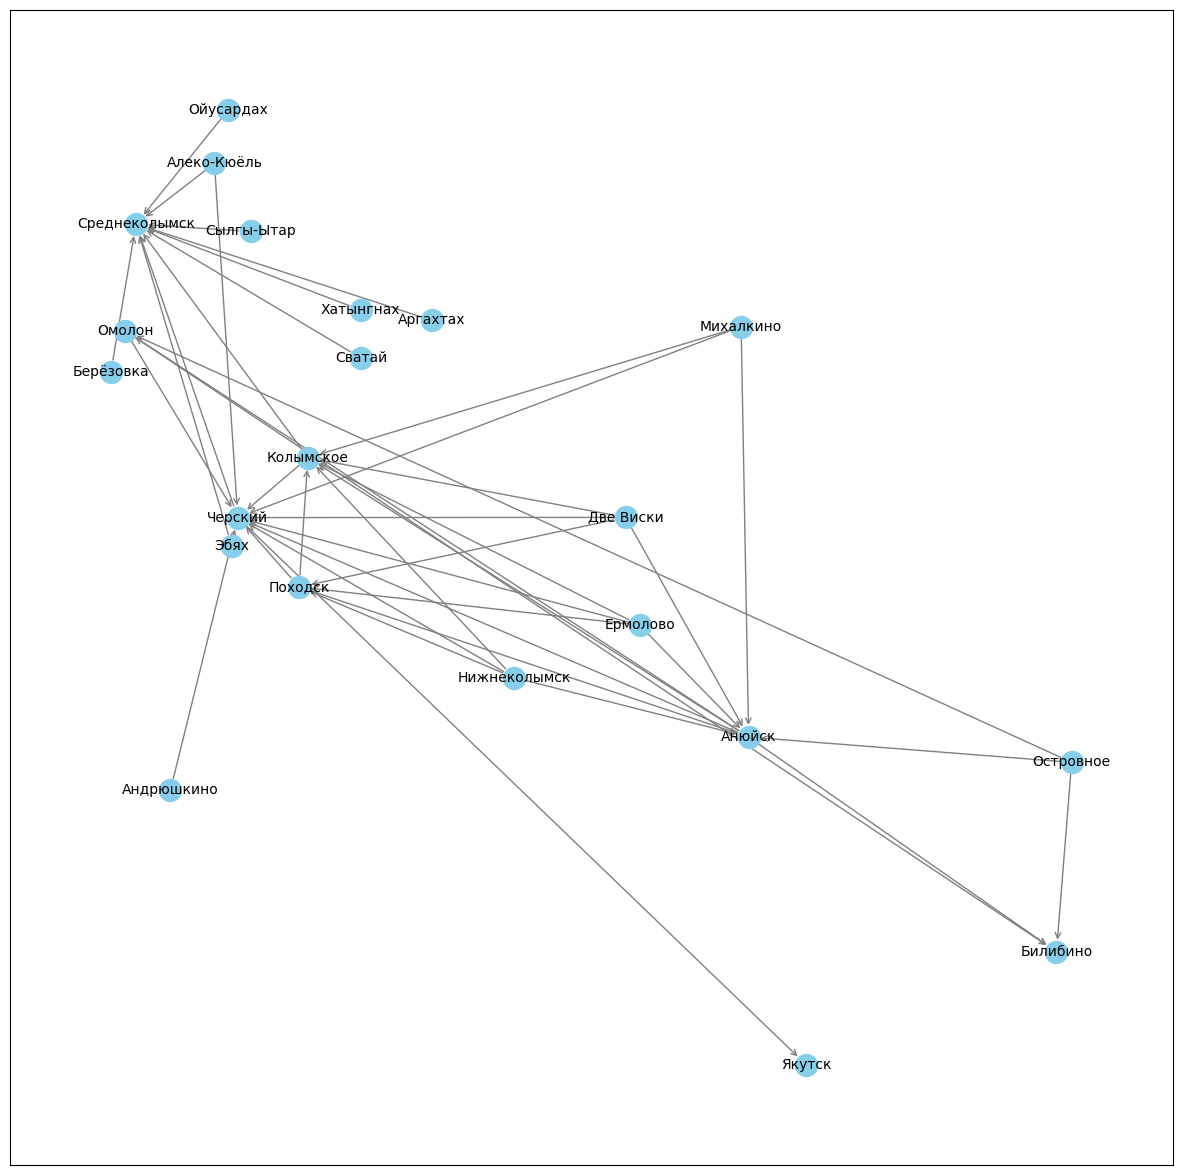

In [ ]:
for _, row in data_graph.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G.add_edge(source, target, weight=gravity_force)

# Настройка параметров для визуализации
pos = nx.spring_layout(G, k=1, scale=3)  # Расположение узлов
#edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}  # Метки для рёбер
plt.figure(figsize=(15,15))  # Размер графика
nx.draw_networkx_nodes(G, pos, node_size=250, node_color='skyblue')  # Узлы
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='->', arrows=True)  # Рёбра
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.savefig("G_cold_3_deleted.png")
print(list(G.nodes))
# Получаем количество узлов
print(G.number_of_nodes())

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Получение списка всех узлов
all_nodes = list(G.nodes())
# Подсчет количества входящих рёбер для каждого узла
incoming_counts = {}
for node in all_nodes:
    incoming_count = len(list(G.predecessors(node)))
    incoming_counts[node] = incoming_count

# Получение топ-10 узлов с наибольшим количеством входящих рёбер
top_10_nodes = Counter(incoming_counts).most_common(10)

# Печать результата
for node, count in top_10_nodes:
    print(f"{node}: {count}")

Черский: 10
Среднеколымск: 10
Колымское: 6
Анюйск: 6
Походск: 3
Билибино: 3
Омолон: 2
Якутск: 1
Хатынгнах: 0
Сылгы-Ытар: 0


### Граф по Т

22
['Анюйск', 'Билибино', 'Две Виски', 'Ермолово', 'Колымское', 'Михалкино', 'Нижнеколымск', 'Омолон', 'Островное', 'Походск', 'Черский', 'Среднеколымск', 'Алеко-Кюёль', 'Аргахтах', 'Берёзовка', 'Ойусардах', 'Сватай', 'Сылгы-Ытар', 'Хатынгнах', 'Эбях', 'Андрюшкино', 'Якутск']


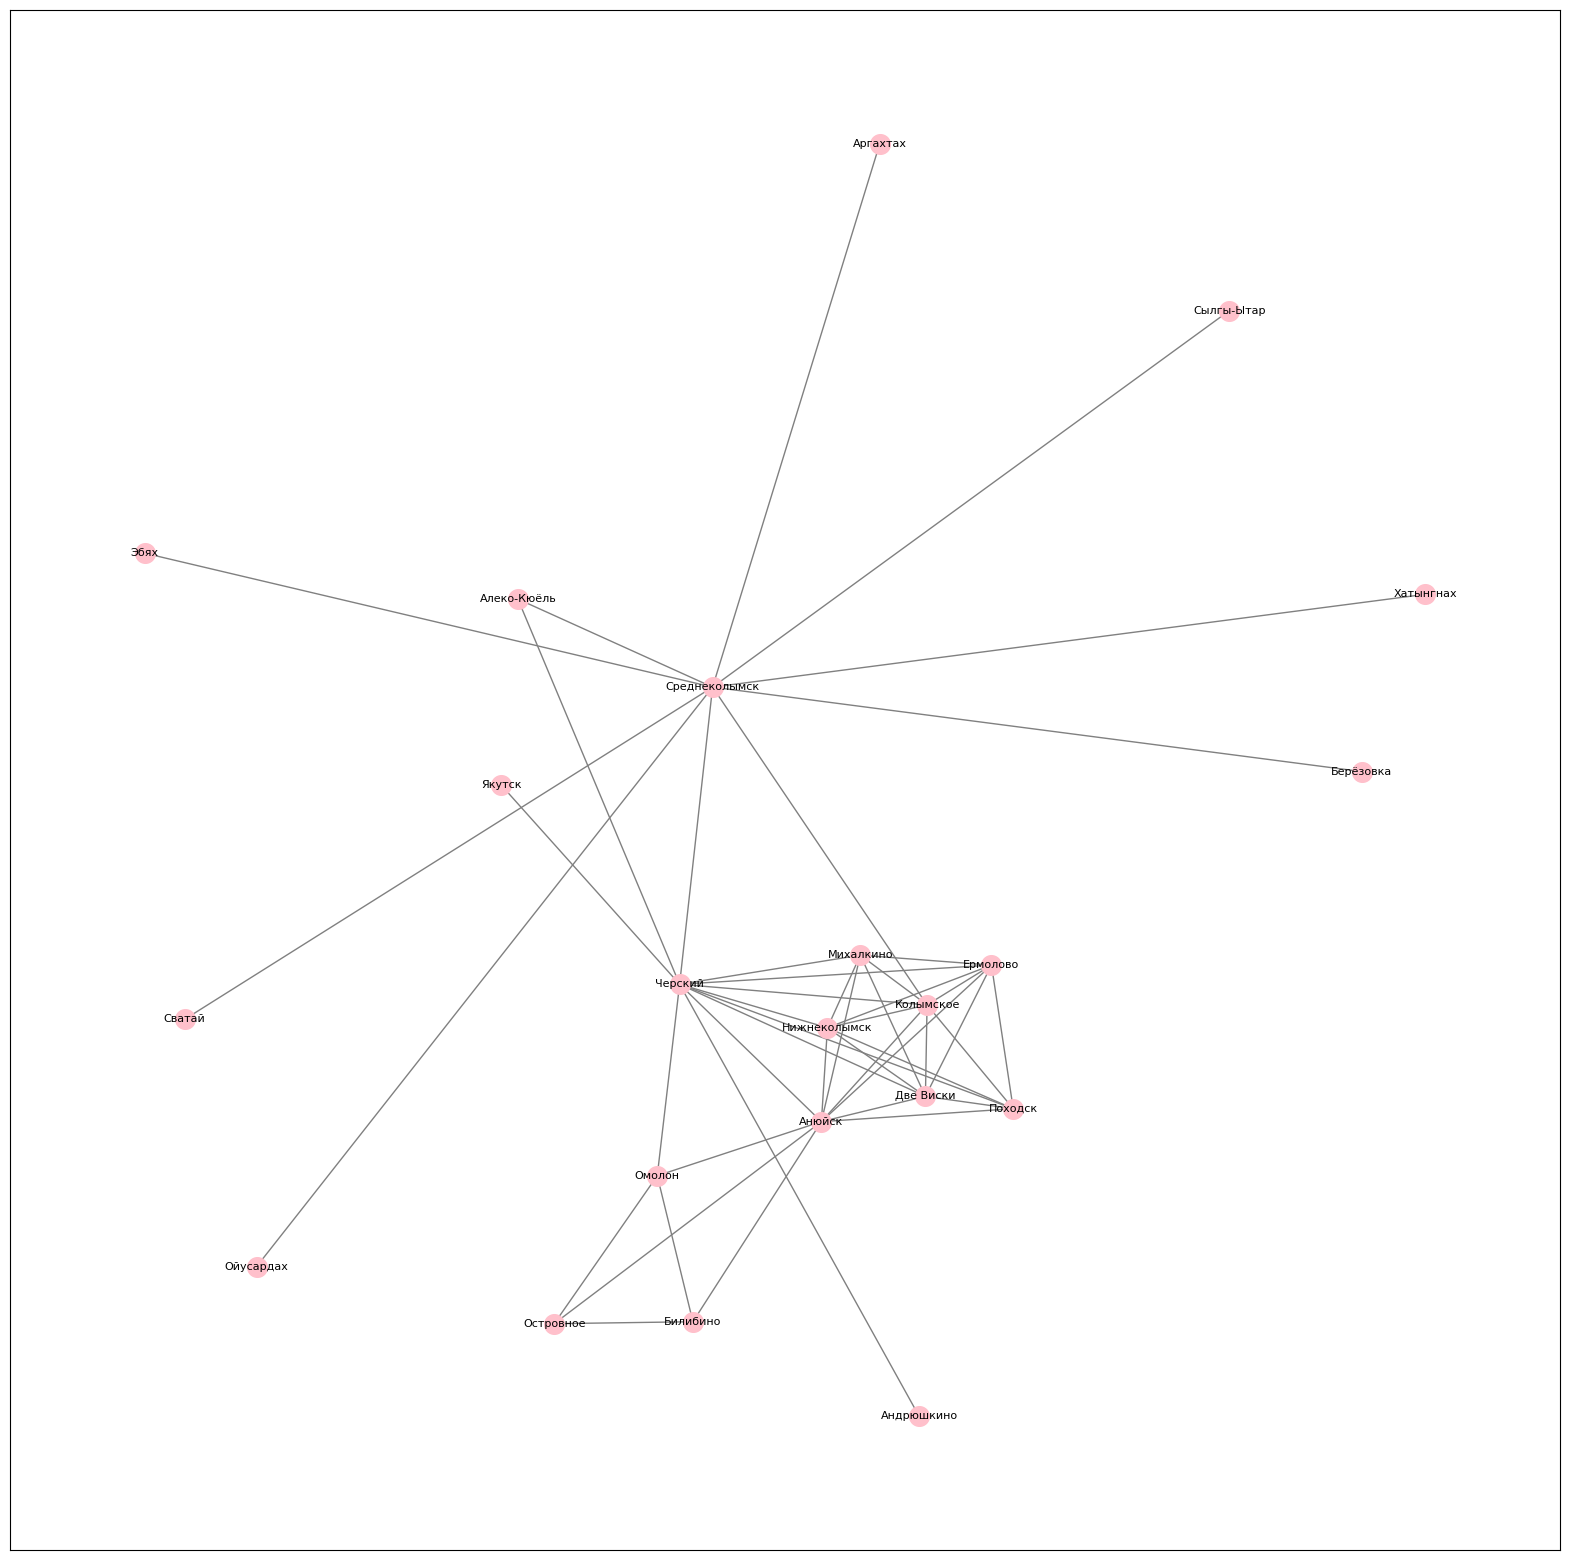

In [ ]:
# Чтение данных из CSV-файла
data_graph_time = min_time_cold_deleted

# Создаем пустой ненаправленный граф
G_time = nx.Graph()
for _, row in data_graph_time.iterrows():
    settl1 = row['depart']
    settl2 = row['arrival']
    time = row['min']

    # Если время между деревнями не равно нулю, добавляем ребро
    if time != 0:
        G_time.add_edge(settl1, settl2, weight=time)

# Настройка параметров для визуализации
pos_time = nx.spring_layout(G_time, k=1, scale=4)  # Расположение узлов
#edge_labels_time = {(u, v): d['weight'] for u, v, d in G_time.edges(data=True)}  # Метки для рёбер
G_time
plt.figure(figsize=(20,20))  # Размер графика
nx.draw_networkx_nodes(G_time, pos_time, node_size=200, node_color='pink')  # Узлы
nx.draw_networkx_edges(G_time, pos_time, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(G_time, pos_time, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_time, pos_time, edge_labels=edge_labels, font_size=10)  # Метки рёбер

print(G_time.number_of_nodes())

print(list(G_time.nodes))
plt.savefig("T_cold_2_deleted.png")

In [ ]:
# Находим сильные компоненты связности
components = list(nx.connected_components(G_time))
print(components)

[{'Сылгы-Ытар', 'Андрюшкино', 'Берёзовка', 'Михалкино', 'Походск', 'Якутск', 'Ойусардах', 'Нижнеколымск', 'Хатынгнах', 'Эбях', 'Среднеколымск', 'Ермолово', 'Омолон', 'Две Виски', 'Анюйск', 'Сватай', 'Черский', 'Билибино', 'Алеко-Кюёль', 'Колымское', 'Островное', 'Аргахтах'}]


In [ ]:
# Находим слабые компоненты связности
components_w = list(nx.weakly_connected_components(G))
print(components_w)

[{'Сылгы-Ытар', 'Андрюшкино', 'Берёзовка', 'Михалкино', 'Походск', 'Якутск', 'Хатынгнах', 'Нижнеколымск', 'Ойусардах', 'Эбях', 'Среднеколымск', 'Ермолово', 'Омолон', 'Анюйск', 'Две Виски', 'Сватай', 'Черский', 'Билибино', 'Алеко-Кюёль', 'Колымское', 'Островное', 'Аргахтах'}]


### Анализ графа

### Анализ кластеров

In [ ]:
data_graph_G = sorted_normalized_df_deleted
# Создание ненаправленного графа
G_undirect = nx.Graph()

for _, row in data_graph_G.iterrows():
    vertex1 = row['settl1']  # Первая вершина
    vertex2 = row['settl2']  # Вторая вершина
    gravity_force = row['LocalGravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_undirect.add_edge(vertex1, vertex2, weight=gravity_force)
# Настройка параметров для визуализации
#pos = nx.spring_layout(G_undirect)  # Расположение узлов
#edge_labels = {(u, v): d['weight'] for u, v, d in G_undirect.edges(data=True)}  # Метки для рёбер
#plt.figure(figsize=(10,10))  # Размер графика
#nx.draw_networkx_nodes(G_undirect, pos, node_size=200, node_color='skyblue')  # Узлы
#nx.draw_networkx_edges(G_undirect, pos, edge_color='gray')  # Рёбра
#nx.draw_networkx_labels(G_undirect, pos, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_undirect, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер


### Обратный граф

In [ ]:
import pandas as pd
# Функция для обработки значений
def  gravity_reverse(x):
    if x == 0:
        return 0
    else:
        return 1 / x

# Применяем функцию к столбцу 'Цена'
df_reverse = sorted_normalized_df_deleted.copy()
df_reverse['reverse_gravity'] = df_reverse['LocalGravity'].apply(gravity_reverse)

columns_to_drop = ['LocalGravity']
df_reverse.drop(columns_to_drop, axis=1, inplace=True)
#df_reverse.sort_values(by='reverse_gravity', ascending=False)

In [ ]:
#Граф с обратным G (то есть 1/G)
data_reverse = df_reverse
# Создание направленного графа
G_reverse = nx.DiGraph()
for _, row in data_reverse.iterrows():
    source = row['settl2']  # Начальная вершина
    target = row['settl1']  # Конечная вершина
    gravity_force = row['reverse_gravity']

    # Проверяем, чтобы гравитационная сила была ненулевой
    if gravity_force != 0:
        G_reverse.add_edge(source, target, weight=gravity_force)

# Настройка параметров для визуализации
#pos = nx.spring_layout(G_reverse, k=4, scale=4)  # Расположение узлов
#edge_labels = {(u, v): d['weight'] for u, v, d in G_reverse.edges(data=True)}  # Метки для рёбер
#plt.figure(figsize=(20,20))  # Размер графика
#nx.draw_networkx_nodes(G_reverse, pos, node_size=200, node_color='lightgreen')  # Узлы
#nx.draw_networkx_edges(G_reverse, pos, edge_color='gray', arrowstyle='->', arrows=True)  # Рёбра
#nx.draw_networkx_labels(G_reverse, pos, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(G_reverse, pos, edge_labels=edge_labels, font_size=10)  # Метки рёбер

### Кластеризация

In [ ]:
# Выполнение модулярной кластеризации. мера качества разбиения графа на сообщества. Она позволяет находить группы узлов, внутри которых связи сильнее, чем снаружи.
partition = cl.best_partition(G_undirect)
mod = cl.modularity(partition, G_undirect)

print("Модулярность:", mod)

# Распечатка сообществ
communities = {}
for node, com_id in partition.items():
    if com_id not in communities:
        communities[com_id] = []
    communities[com_id].append(node)

for com_id, nodes in communities.items():
    print(f"Сообщество {com_id + 1}: {', '.join(nodes)}")

from networkx.algorithms.centrality import degree_centrality

communities = partition.values()
community_centers = {}

for comm_id in set(communities):
    nodes_in_comm = [node for node, c in partition.items() if c == comm_id]
    degrees = {node: G_undirect.degree(node) for node in nodes_in_comm}
    center = max(degrees, key=degrees.get)
    community_centers[comm_id] = center
print("Центры сообществ:", community_centers)

Модулярность: 0.4587457493537608
Сообщество 2: Черский, Походск, Колымское, Нижнеколымск, Ермолово, Андрюшкино, Две Виски, Михалкино, Якутск
Сообщество 3: Среднеколымск, Хатынгнах, Сылгы-Ытар, Ойусардах, Сватай, Аргахтах, Берёзовка, Алеко-Кюёль, Эбях
Сообщество 1: Анюйск, Островное, Билибино, Омолон
Центры сообществ: {0: 'Анюйск', 1: 'Черский', 2: 'Среднеколымск'}


### Выявление частовстречаемых поселений

In [ ]:
# Расчёт степенной центральности
degree = nx.degree_centrality(G)

# Сортируем населённые пункты по уменьшению степенной центральности
sorted_centralities = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Вывод результатов
for node, centrality in sorted_centralities:
    print(f"{node}: {centrality:.4f}")

Черский: 0.5714
Среднеколымск: 0.4762
Анюйск: 0.4762
Колымское: 0.3810
Походск: 0.2857
Нижнеколымск: 0.1905
Ермолово: 0.1905
Две Виски: 0.1905
Омолон: 0.1905
Островное: 0.1429
Билибино: 0.1429
Михалкино: 0.1429
Алеко-Кюёль: 0.0952
Хатынгнах: 0.0476
Сылгы-Ытар: 0.0476
Ойусардах: 0.0476
Сватай: 0.0476
Аргахтах: 0.0476
Берёзовка: 0.0476
Эбях: 0.0476
Андрюшкино: 0.0476
Якутск: 0.0476


In [ ]:
#Вершины на концах мостов. Критичны для удаления
bridges = list(nx.bridges(G_undirect))
bridge_nodes = set([u for u, _ in bridges] + [v for _, v in bridges])
print(bridge_nodes)

{'Сватай', 'Якутск', 'Хатынгнах', 'Ойусардах', 'Сылгы-Ытар', 'Черский', 'Андрюшкино', 'Эбях', 'Аргахтах', 'Среднеколымск', 'Берёзовка'}


In [ ]:
def find_hubs(graph):
    degrees = dict(graph.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    hubs = [n for n, _ in sorted_degrees[:7]]
    return hubs

hubs = find_hubs(G_reverse)
print(f"Основные хабы: {hubs}")

Основные хабы: ['Черский', 'Среднеколымск', 'Анюйск', 'Колымское', 'Походск', 'Нижнеколымск', 'Ермолово']


In [ ]:
# Вычисляем промежуточную центральность для каждого узла. Центральность по промежуточности, показывает, насколько часто узел находится на кратчайших путях между другими узлами графа
bc = nx.betweenness_centrality(G_reverse, normalized=False)
sorted_bc = sorted(bc.items(), key=lambda item: item[1], reverse=True)
important_nodes_bc = [k for k, v in sorted_bc[:7]]
print(important_nodes_bc)

['Черский', 'Анюйск', 'Колымское', 'Омолон', 'Походск', 'Хатынгнах', 'Среднеколымск']


In [ ]:
#Центральность по близости, показывает, насколько быстро можно достичь всех других узлов графа из данного узла. Можно оценить, насколько населенный пункт является "опорным" с точки зрения доступности остальных точек
cc = nx.closeness_centrality(G_reverse)
sorted_cc = sorted(cc.items(), key=lambda item: item[1], reverse=True)
important_nodes_cc = [k for k, v in sorted_cc[:7]]
print(important_nodes_cc)

['Среднеколымск', 'Черский', 'Колымское', 'Анюйск', 'Якутск', 'Билибино', 'Омолон']


In [ ]:
from collections import Counter
def sort_nodes_by_frequency(degree_centrality, closeness_centrality, betweenness_centrality, bridge_endpoints):
    # Преобразуем множества в списки, если они таковыми являются
    if isinstance(degree_centrality, set):
        degree_centrality = list(degree_centrality)
    if isinstance(closeness_centrality, set):
        closeness_centrality = list(closeness_centrality)
    if isinstance(betweenness_centrality, set):
        betweenness_centrality = list(betweenness_centrality)
    if isinstance(bridge_endpoints, set):
        bridge_endpoints = list(bridge_endpoints)

    # Объединяем все списки узлов в один большой список
    all_nodes = degree_centrality + closeness_centrality + betweenness_centrality + bridge_endpoints

    # Подсчитываем частоту встречаемости каждого узла
    node_counts = Counter(all_nodes)

    # Сортируем узлы по убыванию частоты
    sorted_nodes = sorted(node_counts.items(), key=lambda x: (-x[1], x[0]))

    return sorted_nodes

sorted_list = sort_nodes_by_frequency(hubs, important_nodes_cc, important_nodes_bc, bridge_nodes)
print(sorted_list)

[('Среднеколымск', 4), ('Черский', 4), ('Анюйск', 3), ('Колымское', 3), ('Омолон', 2), ('Походск', 2), ('Хатынгнах', 2), ('Якутск', 2), ('Андрюшкино', 1), ('Аргахтах', 1), ('Берёзовка', 1), ('Билибино', 1), ('Ермолово', 1), ('Нижнеколымск', 1), ('Ойусардах', 1), ('Сватай', 1), ('Сылгы-Ытар', 1), ('Эбях', 1)]


### Поиск минимального остовного дерева (толька на ненаправленных графах)

In [ ]:
# Проверяем, является ли граф ациклическим
if not nx.is_directed_acyclic_graph(G):
    print("Граф содержит циклы!")
else:
    print("Это ацикличеcкий граф")

Это ацикличеcкий граф


In [ ]:
# Проверка сильной связности
if not nx.is_strongly_connected(G):
    print("Граф не является сильно связным") #Нет пути между любыми двумя вершинами в обоих направлениях (поэтому не ищет и сильные компоненты связности)
else:
    print("Это сильно связанный граф")

Граф не является сильно связным


In [ ]:
# Находим минимальное остовное дерево с помощью алгоритма Прима
MST = nx.minimum_spanning_tree(G_time, algorithm='boruvka')

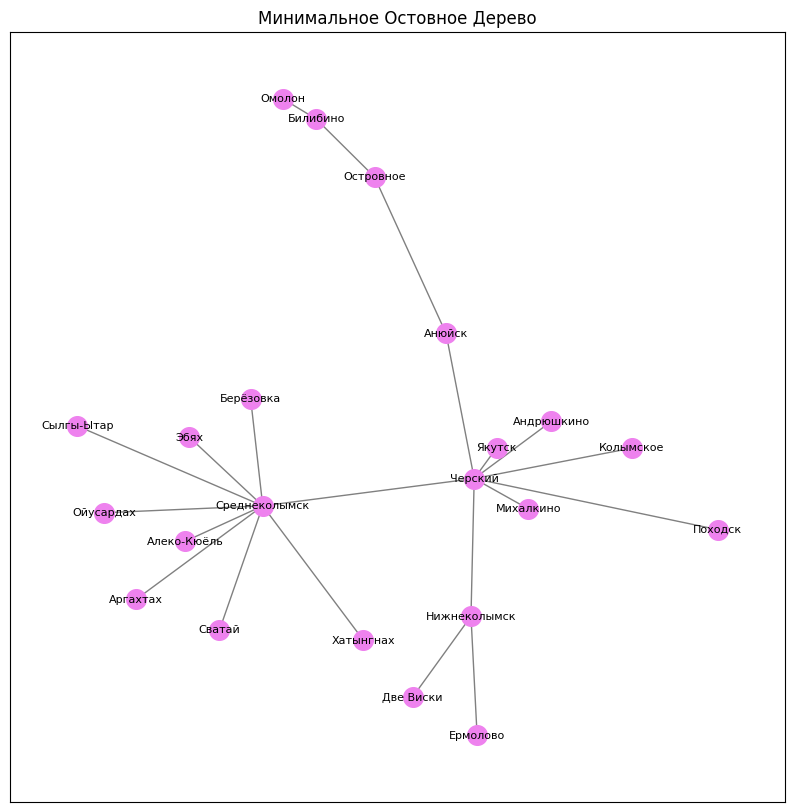

In [ ]:
# Визуализация минимального остовного дерева
pos_MST = nx.spring_layout(MST)  # Расположение вершин
labels = nx.get_edge_attributes(MST, 'weight')  # Вес каждого ребра
plt.figure(figsize=(10, 10))  # Размер графика
# Настройка параметров для визуализации
pos_MST = nx.spring_layout(MST)  # Расположение узлов
nx.draw_networkx_nodes(MST, pos_MST, node_size=200, node_color='violet')  # Узлы
nx.draw_networkx_edges(MST, pos_MST, edge_color='gray')  # Рёбра
nx.draw_networkx_labels(MST, pos_MST, font_size=8, font_family='sans-serif')  # Метки узлов
#nx.draw_networkx_edge_labels(MST, pos_MST, edge_labels=edge_labels, font_size=10)  # Метки рёбер

plt.title('Минимальное Остовное Дерево')
plt.show()

### Определение узлов-стоков и узлов-источников

In [ ]:
#Определение узлов без входящих/исходящих рёбер (только для направленных графов)
def find_sources_and_sinks(G):
    sources = []
    sinks = []

    # Проверяем каждую вершину
    for node in G.nodes():
        has_incoming_edge = False
        has_outgoing_edge = False

        # Проверка наличия входящих рёбер
        for other_node in G.predecessors(node):
            has_incoming_edge = True
            break

        # Проверка наличия исходящих рёбер
        if len(list(G.successors(node))) > 0:
            has_outgoing_edge = True

        # Добавляем вершину в соответствующий список
        if not has_incoming_edge:
            sources.append(node)
        if not has_outgoing_edge:
            sinks.append(node)

    return sources, sinks

# Получение результатов
sources, sinks = find_sources_and_sinks(G)
print("Sources:", sources)
print("Sinks:", sinks)

Sources: ['Хатынгнах', 'Сылгы-Ытар', 'Ойусардах', 'Сватай', 'Аргахтах', 'Берёзовка', 'Алеко-Кюёль', 'Эбях', 'Нижнеколымск', 'Островное', 'Ермолово', 'Андрюшкино', 'Две Виски', 'Михалкино']
Sinks: ['Среднеколымск', 'Билибино', 'Якутск']


# Сравнение графов

In [ ]:
#Сравнение двух направленных графов
def compare_digraphs(G_old, G_new):
    # Степенная центральность узлов
    degree_centrality_old = nx.degree_centrality(G_old)
    degree_centrality_new = nx.degree_centrality(G_new)

    # Количество узлов только с входящими/выходящими рёбрами
    only_incoming_nodes_old = [node for node, out_degree in G_old.out_degree() if out_degree == 0]
    only_outgoing_nodes_old = [node for node, in_degree in G_old.in_degree() if in_degree == 0]

    only_incoming_nodes_new = [node for node, out_degree in G_new.out_degree() if out_degree == 0]
    only_outgoing_nodes_new = [node for node, in_degree in G_new.in_degree() if in_degree == 0]


    # Вывод результатов
    print("Степенная центральность:")
    sorted_nodes = sorted(set(degree_centrality_old.keys()) | set(degree_centrality_new.keys()), key=lambda x: -(degree_centrality_old.get(x, 0) + degree_centrality_new.get(x, 0)))
    for node in sorted_nodes:
        old_value = degree_centrality_old.get(node, None)
        new_value = degree_centrality_new.get(node, None)
        print(f"{node}: старый граф - {old_value}, новый граф - {new_value}")

    print("\nКоличество узлов только с входящими рёбрами:")
    print(f"Старый граф: {only_incoming_nodes_old}")
    print(f"Новый граф: {only_incoming_nodes_new}")

    print("\nКоличество узлов только с выходящими рёбрами:")
    print(f"Старый граф: {only_outgoing_nodes_old}")
    print(f"Новый граф: {only_outgoing_nodes_new}")


compare_digraphs(G, G)

Степенная центральность:
Черский: старый граф - 0.5714285714285714, новый граф - 0.5714285714285714
Среднеколымск: старый граф - 0.47619047619047616, новый граф - 0.47619047619047616
Анюйск: старый граф - 0.47619047619047616, новый граф - 0.47619047619047616
Колымское: старый граф - 0.38095238095238093, новый граф - 0.38095238095238093
Походск: старый граф - 0.2857142857142857, новый граф - 0.2857142857142857
Нижнеколымск: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Ермолово: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Две Виски: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Омолон: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Михалкино: старый граф - 0.14285714285714285, новый граф - 0.14285714285714285
Билибино: старый граф - 0.14285714285714285, новый граф - 0.14285714285714285
Островное: старый граф - 0.14285714285714285, новый граф - 0.14285714285714285
Алеко-Кюёль: старый граф - 0.0952380

In [ ]:
#Сравнение двух ненаправленных графов
def compare_graphs(G_old, G_new):
    # Промежуточная центральность
    betweenness_centrality_old = nx.betweenness_centrality(G_old)
    betweenness_centrality_new = nx.betweenness_centrality(G_new)

    # Близостная центральность
    closeness_centrality_old = nx.closeness_centrality(G_old)
    closeness_centrality_new = nx.closeness_centrality(G_new)

    #Степенная центральность
    degree_centrality_old = nx.degree_centrality(G_old)
    degree_centrality_new = nx.degree_centrality(G_new)

    #Узлы-мосты
    bridges_old = nx.bridges(G_old)
    bridges_new = nx.bridges(G_new)

    # Компоненты сильной связности
    strongly_connected_components_old = list(nx.connected_components(G_old))
    strongly_connected_components_new = list(nx.connected_components(G_new))

    # Количество изолированных узлов
    isolated_nodes_old = [node for node, degree in G_old.degree() if degree == 0]
    isolated_nodes_new = [node for node, degree in G_new.degree() if degree == 0]

    # Вывод результатов
    print("Степенная центральность:")
    sorted_nodes = sorted(set(degree_centrality_old.keys()) | set(degree_centrality_new.keys()), key=lambda x: -(degree_centrality_old.get(x, 0) + degree_centrality_new.get(x, 0)))
    for node in sorted_nodes:
        old_value = degree_centrality_old.get(node, None)
        new_value = degree_centrality_new.get(node, None)
        print(f"{node}: старый граф - {old_value}, новый граф - {new_value}")

    print("Промежуточная центральность:")
    sorted_nodes = sorted(set(betweenness_centrality_old.keys()) | set(betweenness_centrality_new.keys()), key=lambda x: -(betweenness_centrality_old.get(x, 0) + betweenness_centrality_new.get(x, 0)))
    for node in sorted_nodes:
        old_value = betweenness_centrality_old.get(node, None)
        new_value = betweenness_centrality_new.get(node, None)
        print(f"{node}: старый граф - {old_value}, новый граф - {new_value}")

    print("\nБлизостная центральность:")
    sorted_nodes = sorted(set(closeness_centrality_old.keys()) | set(closeness_centrality_new.keys()), key=lambda x: -(closeness_centrality_old.get(x, 0) + closeness_centrality_new.get(x, 0)))
    for node in sorted_nodes:
        old_value = closeness_centrality_old.get(node, None)
        new_value = closeness_centrality_new.get(node, None)
        print(f"{node}: старый граф - {old_value}, новый граф - {new_value}")

    print("\nУзлы-мосты:")
    print(f"Старый граф: {bridges_old}")
    print(f"Новый граф: {bridges_new}")

    print("\nКоличество компонент сильной связности:")
    print(f"Старый граф: {len(strongly_connected_components_old)}")
    print(f"Новый граф: {len(strongly_connected_components_new)}")

    print("\nКоличество изолированных узлов:")
    print(f"Старый граф: {isolated_nodes_old}")
    print(f"Новый граф: {isolated_nodes_new}")

compare_graphs(G_undirect, G_undirect)

Степенная центральность:
Черский: старый граф - 0.5714285714285714, новый граф - 0.5714285714285714
Среднеколымск: старый граф - 0.47619047619047616, новый граф - 0.47619047619047616
Анюйск: старый граф - 0.47619047619047616, новый граф - 0.47619047619047616
Колымское: старый граф - 0.38095238095238093, новый граф - 0.38095238095238093
Походск: старый граф - 0.2857142857142857, новый граф - 0.2857142857142857
Нижнеколымск: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Ермолово: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Две Виски: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Омолон: старый граф - 0.19047619047619047, новый граф - 0.19047619047619047
Михалкино: старый граф - 0.14285714285714285, новый граф - 0.14285714285714285
Билибино: старый граф - 0.14285714285714285, новый граф - 0.14285714285714285
Островное: старый граф - 0.14285714285714285, новый граф - 0.14285714285714285
Алеко-Кюёль: старый граф - 0.0952380